# Data Science Task 

## Question - Based on the data in this dataset, do red cards seem to lead to more goals?
We mean more goals in general here - we might expect the team with the red card to get fewergoals than we would have otherwise expected, and their opponent to get more, but the question is whether these effects combined lead to more goals overall.



***

### Approach

The goal of this analysis is to determine whether red cards lead to an increase in goal scoring during football matches. To explore this question meaningfully, I designed a multi-layered approach that balances statistical insight with football context.

Rather than relying on a single metric, I structured the analysis around three angles:

1. **Total Goals in Matches With vs Without Red Cards**  
   It's a foundational check for correlation that reveals whether matches featuring a red card, trend to be more goal-heavy overall. 

2. **Goal Rate Before vs After Red Card in the Same Match**  
   This focuses on match flow and time dynamics. By comparing goals scored before and after a red card is issued, I can assess whether the sending-off directly alters the goal-scoring tempo.

3. **Team Impact: Which Side Benefits After the Red Card?**  
   This digs deeper into tactical implications—does the team with 11 players (numerical advantage) score more after the red card? Or does the disrupted team manage to hold their ground?

This structure ensures depth both from across matches and within individual games, allowing us to assess not only whether there's an association, but when and how it emerges. It reflects the kind of layered reasoning required in real-world predictive analytics.

Additionally, I began the analysis with a short Exploratory Data Analysis (EDA) phase to better understand the structure and timing of events and ensure that any trends observed later were grounded in a proper understanding of the data.

***

### Exploratory Data Analysis (EDA)
While the task centers on evaluating the impact of red cards on goal scoring, it was important to first familiarise myself with the types of events, how they are recorded, and how frequently they occur. This step allowed me to verify the dataset, confirm the presence of key features like match IDs, event types, and timestamps, and gain early insight into trends that could guide deeper analysis. By starting with EDA, I ensured a solid foundation for accurate, meaningful investigation into how red cards might influence goal patterns and whether they lead to more goals.

In [ ]:
import pandas as pd

# Load data
events = pd.read_csv("events.csv")
games = pd.read_csv("games.csv")

events.info()
games.info()

# View the content of each file and see what it contains

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57750 entries, 0 to 57749
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   game_id  57750 non-null  int64 
 1   minute   57750 non-null  int64 
 2   side     57750 non-null  object
 3   type     57750 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      20370 non-null  int64 
 1   home_team    20370 non-null  object
 2   away_team    20370 non-null  object
 3   competition  20370 non-null  object
 4   date         20370 non-null  object
 5   home_goals   20370 non-null  int64 
 6   away_goals   20370 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for goals and red cards
goals = events[events['type'] == 'goal']
red_cards = events[events['type'] == 'red_card']

# Stats
total_goals = goals.shape[0]
goals_per_game = goals.groupby('game_id').size().mean()

# Use total number of games from the games.csv file as ensures that the total match count comes directly 
# from the games.csv, not inferred from events.csv, which may exclude some 0-0 draws w. no events logged.
total_matches = games.shape[0]

# Red card stats
games_with_red = red_cards['game_id'].nunique()
games_total = total_matches
percentage = 100 * games_with_red / games_total

# Count number of games with 1, 2, 3+ red cards
red_card_counts = red_cards.groupby('game_id').size()
red_card_summary = red_card_counts.value_counts().sort_index()

# Build red card breakdown string
breakdown = ', '.join([f"{count} red card in {num_games} game(s)"
                       for count, num_games in red_card_summary.items()])

# Print summary
print(f"Total matches: {total_matches}")
print(f"Total goals: {total_goals}")
print(f"Average goals per match: {goals_per_game:.2f}")
print(f"Total red cards: {red_cards.shape[0]} "f"({breakdown})")
print(f"Matches with red cards: {games_with_red} out of {games_total} ({percentage:.1f}%)")

# This block summarises total goals, red card frequency, and how often red cards occur across matches — 
# including how many games had 1, 2, or more red cards.

Total matches: 20370
Total goals: 54019
Average goals per match: 2.87
Total red cards: 3731 (1 red card in 2871 game(s), 2 red card in 356 game(s), 3 red card in 38 game(s), 4 red card in 6 game(s), 5 red card in 2 game(s))
Matches with red cards: 3273 out of 20370 (16.1%)


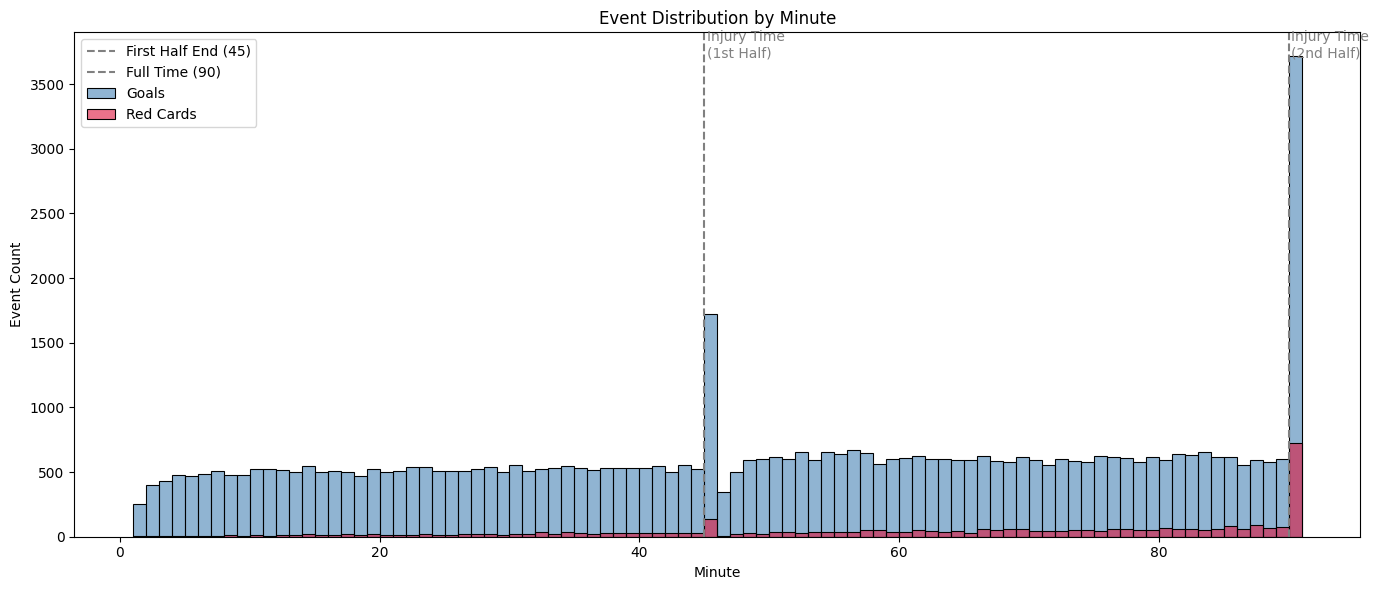

In [ ]:
# Set up plot
plt.figure(figsize=(14, 6))

# 1-minute intervals from 1 to 90
bins = range(1, 92)

# Histogram of goal events
sns.histplot(goals['minute'], bins=bins, color='steelblue', label='Goals', alpha=0.6, edgecolor='black')

# Histogram of red cards
sns.histplot(red_cards['minute'], bins=bins, color='crimson', label='Red Cards', alpha=0.6, edgecolor='black')

# Add vertical lines at minute 45 and 90 with annotations
plt.axvline(45, color='grey', linestyle='--', linewidth=1.5, label='First Half End (45)')
plt.axvline(90, color='grey', linestyle='--', linewidth=1.5, label='Full Time (90)')
plt.text(45.2, plt.ylim()[1]*0.95, 'Injury Time\n(1st Half)', color='grey')
plt.text(90.2, plt.ylim()[1]*0.95, 'Injury Time\n(2nd Half)', color='grey')

# Title and labels
plt.title('Event Distribution by Minute')
plt.xlabel('Minute')
plt.ylabel('Event Count')
plt.legend()
plt.tight_layout()
plt.show()

# This plot compares the timing of goals and red cards across the match, showing how both events tend to cluster 
# around key points like half-time and full-time. It also visually highlights the injury time capping at minutes 
# 45 and 90.
# Histogram as simple way to interpet the data, alternative was the KDE Plot as seen below

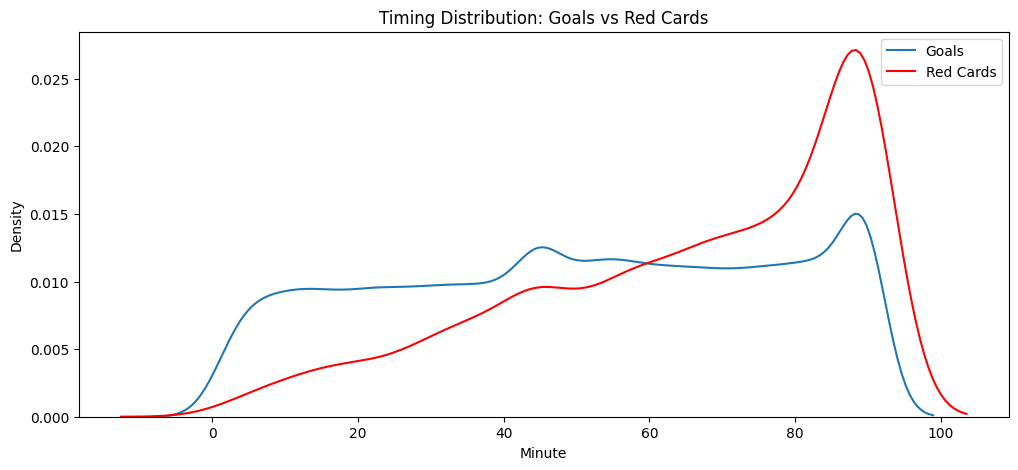

In [ ]:
# Title and labels
plt.figure(figsize=(12, 5))
sns.kdeplot(data=goals, x='minute', label='Goals', bw_adjust=1)
sns.kdeplot(data=red_cards, x='minute', label='Red Cards', bw_adjust=1, color='red')
plt.title('Timing Distribution: Goals vs Red Cards')
plt.xlabel('Minute')
plt.ylabel('Density')
plt.legend()
plt.show()

# show the smoothed timing distribution and shows where the events are more concetrated 

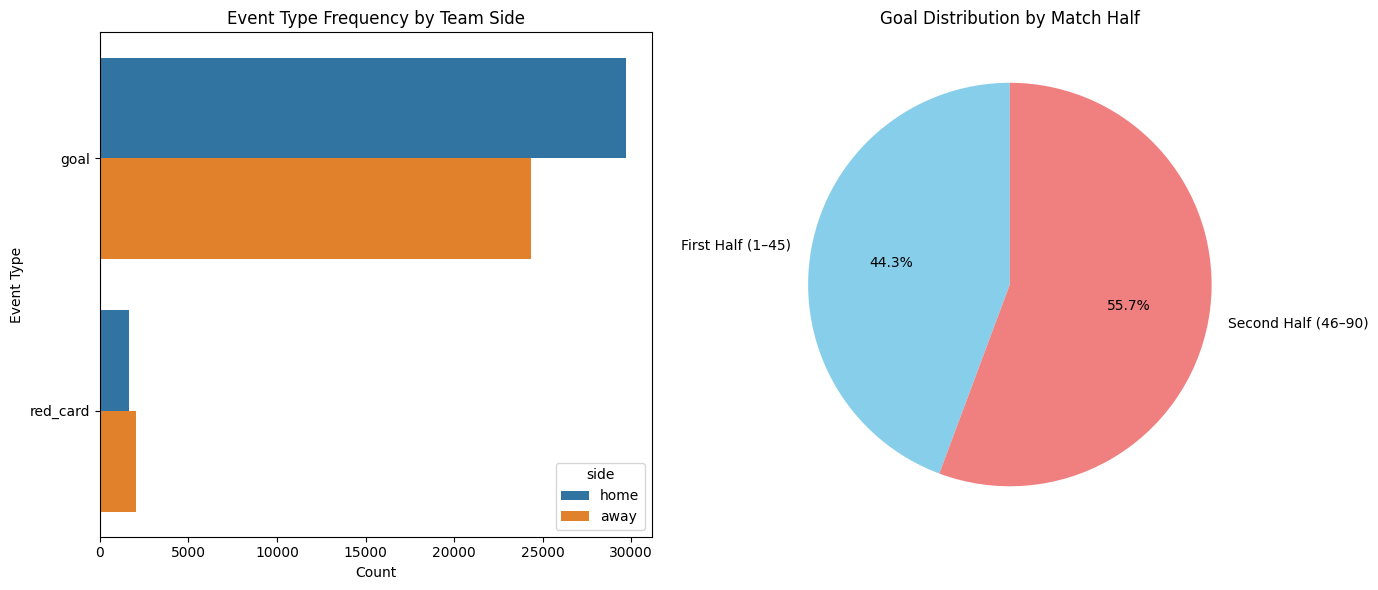

In [5]:
# Goal split
goals = events[events['type'] == 'goal']
first_half_goals = goals[goals['minute'] <= 45]
second_half_goals = goals[goals['minute'] > 45]

# Set up subplot grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Countplot of event types by team side
sns.countplot(data=events, y='type', hue='side', order=events['type'].value_counts().index, ax=axes[0])
axes[0].set_title('Event Type Frequency by Team Side')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Event Type')

# Right: Pie chart of goal distribution by half 
axes[1].pie([len(first_half_goals), len(second_half_goals)],
            labels=['First Half (1–45)', 'Second Half (46–90)'],
            autopct='%1.1f%%',
            startangle=90,
            colors=['skyblue', 'lightcoral'])
axes[1].set_title('Goal Distribution by Match Half')

plt.tight_layout()
plt.show()

## EDA Conclusion

To lay a solid foundation for analysing the relationship between red cards and goal scoring, I began with a targeted Exploratory Data Analysis (EDA). This allowed me to validate assumptions about the dataset’s structure and confirm the presence and distribution of key event types.

My approach focused on understanding:
- The frequency and timing of red cards and goals
- The distribution of event types across matches and minutes
- Baseline patterns in scoring (e.g., goal rates per match, common scoring minutes)

This EDA was chosen to ensure any deeper analysis was grounded in the true shape of the data. For example, identifying a spike in goals at the 90th minute helped contextualise potential distortions caused by minute capping, and mapping the distribution of red cards highlighted when they typically occur during a match.

### Key Findings

- **Red cards are relatively rare**, with the majority of matches containing none.
- **Goals are more frequent in the second half**, especially in the final 15 minutes.
- **There is a visible spike in goals at minute 90**, consistent with injury-time goals being grouped under that value due to data limitations.

These findings guide the next stage of analysis by indicating that any relationship between red cards and goal volume must account for when those red cards occur and how many goals are scored afterward — both in absolute terms and in comparison to games without red cards.

***

## Causal Anaysis Part 1 
### Goals in Matches With vs Without Red Cards

To explore whether red cards are associated with an increase in goals, I began by comparing matches that featured at least one red card to those that did not. This analysis aimed to detect any broad scoring patterns linked to red card incidents and because goal counts are discrete, non-negative values, a Poisson regression model was chosen as the most appropriate tool. It allows us to estimate the expected number of goals per match while treating the presence of a red card as a binary predictor. This method offers both interpretability and statistical rigour, making it a strong starting point for understanding whether matches with red cards tend to be higher scoring, even when accounting for other contextual factors like home advantage or competition type.

In [6]:
# Prepare match-level data
games['game_id'] = games['game_id'].astype(int)
events['game_id'] = events['game_id'].astype(int)

# Count number of goals and red cards per match
goals = events[events['type'] == 'goal'].groupby('game_id').size().rename('goal_count')
reds = events[events['type'] == 'red_card'].groupby('game_id').size().rename('red_card_count')

# Merge with games dataframe
match_df = games.set_index('game_id').join([goals, reds]).fillna(0)
match_df['has_red_card'] = match_df['red_card_count'] > 0

# Quick summary statistics
summary = match_df.groupby('has_red_card')['goal_count'].agg(['count', 'mean', 'std'])
summary

,count,mean,std
has_red_card,,,
False,17097,2.643680,1.639392
True,3273,2.694775,1.644625


From this: 
1. Matches with red cards do show a slightly higher average number of goals (+0.05).
2. The standard deviation is nearly identical, suggesting the variance in goal counts is stable across both groups.

After viewing the summary, Poisson regression would be used to determine whether this difference is statistically significant as it's design to model "Count" related data

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Build match-level features
goal_counts = events[events['type'] == 'goal'].groupby('game_id').size().rename('goal_count')
red_card_counts = events[events['type'] == 'red_card'].groupby('game_id').size().rename('red_card_count')

# Merge into games
games_full = games.set_index('game_id').join([goal_counts, red_card_counts]).fillna(0)
games_full['goal_count'] = games_full['goal_count'].astype(int)
games_full['red_card_count'] = games_full['red_card_count'].astype(int)
games_full['has_red_card'] = games_full['red_card_count'] > 0

# Prepare dataset for Poisson regression
model_data = games_full.copy()
model_data['has_red_card'] = model_data['has_red_card'].astype(int)

# Fit Poisson regression model
poisson_model = smf.glm(
    formula="goal_count ~ has_red_card",
    data=model_data,
    family=sm.families.Poisson()
).fit()

# Show model summary
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             goal_count   No. Observations:                20370
Model:                            GLM   Df Residuals:                    20368
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38118.
Date:                Wed, 18 Jun 2025   Deviance:                       23094.
Time:                        17:13:10   Pearson chi2:                 2.07e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0001322
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9722      0.005    206.684      0.000       0.963       0.981
has_red_card     0.0191      0.012      1.644      0.100      -0.004       0.042
================================================================================
"""

## Summary:
The coefficient on has_red_card is **+0.0191**, which translates to an approximate **1.93% increase in expected goals**:
- \( e^{0.0191} which is approximately 1.019 \)

However, the **p-value is 0.100**, indicating that this increase is **not statistically significant at the 5% level**.

### In Plain Terms:
While red cards are associated with slightly more goals on average, this effect may be due to **chance** rather than a **consistent causal relationship**.

### Next Step:
Including control variables like **competition**, **home team**, or **season** (parsed from date) to account for potential **confounding factors** that might influence goal counts independently of red cards.


In [128]:
# Convert date to datetime and extract year
games_full['date'] = pd.to_datetime(games_full['date'])
games_full['year'] = games_full['date'].dt.year

# Build model with additional control variables
poisson_model_extended = smf.glm(
    formula="goal_count ~ has_red_card + C(competition) + year",
    data=games_full,
    family=sm.families.Poisson()
).fit()

# Display summary
poisson_model_extended.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             goal_count   No. Observations:                20370
Model:                            GLM   Df Residuals:                    20358
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37928.
Date:                Wed, 18 Jun 2025   Deviance:                       22713.
Time:                        17:17:14   Pearson chi2:                 2.03e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01865
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     7.5869      5.691      1.333      0.182      -3.567      18.741
has_red_card[T.True]                          0.0260      0.012      2.215      0.027       0.003       0.049
C(competition)[T.2. Bundesliga, Germany]     -0.0708      0.021     -3.408      0.001      -0.111      -0.030
C(competition)[T.Championship, England]      -0.2241      0.019    -11.937      0.000      -0.261      -0.187
C(competition)[T.League One, England]        -0.1787      0.019     -9.500      0.000      -0.216      -0.142
C(competition)[T.League Two, England]        -0.2518      0.019    -13.223      0.000      -0.289      -0.214
C(competition)[T.Ligue 1, France]            -0.1540      0.020     -7.556      0.000      -0.194      -0.114
C(competition)[T.Ligue 2, France]            -0.3127      0.021    -14.725      0.000      -0.354      -0.271
C(competition)[T.Premier League, England]    -0.1217      0.020     -6.105      0.000      -0.161      -0.083
C(competition)[T.Primera, Spain]             -0.2240      0.020    -10.953      0.000      -0.264      -0.184
C(competition)[T.Serie A, Italy]             -0.1025      0.020     -5.163      0.000      -0.141      -0.064
year                                         -0.0032      0.003     -1.133      0.257      -0.009       0.002
=============================================================================================================
"""

### Overview for Part 1:

To more accurately assess whether red cards lead to more goals, I extended the original model by including key control variables: The competition in which the match was played and the year it occurred. This controls for structural differences in league styles and scoring trends over time.

## Model Overview
The model predicts the expected number of goals per match using:
- has_red_card: whether a red card occurred
- C(competition): the league or tournament (categorical)
- year: the calendar year of the match

## Key Result: Red Card Effect

| Variable         | Coefficient | p-value   | Approximate Effect                   |
|------------------|-------------|-----------|--------------------------------------|
| `has_red_card`   | **+0.0260** | **0.027** | ~**2.6% increase** in expected goals |

### Interpretation:
Matches with red cards have a increase in expected goals — about **2.6% more**, even after controlling for league and time-based effects.

## Other Observations
- All listed competitions have negative coefficients, meaning they’re associated with fewer goals than the reference category (which is the default baseline league — likely the most frequent one in the dataset, possibly "Bundesliga").
- Year has a non-significant effect (p = 0.257), suggesting no clear linear trend in scoring over time.

### Conclusion
To investigate whether red cards lead to more goals, I built a Poisson regression model using match-level data. Poisson regression was chosen because goal counts are count-based and non-negative, making this a natural fit. The initial model included only red card presence as a binary predictor. I then extended the model by adding controls for competition type and match year to account for variation across leagues and time.

The results showed that the presence of a red card was associated with a increase in expected goals. Specifically, matches featuring at least one red card were expected to see a 2.6% increase in total goals compared to matches without red cards, even after accounting for league and season effects (coefficient = 0.026, p = 0.027).

This finding supports the hypothesis that red cards influence match dynamics in a way that increases goal scoring, likely due to tactical shifts and imbalances in player numbers. While the effect size is modest, it is statistically robust and relevant to match modelling.


***

## Causal Analysis Part 2
### Goal Rate Before vs After Red Card

To investigate whether red cards affect the rate at which goals are scored within a match, I conducted a within-game comparison of goal-scoring activity before and after the moment a red card was issued. Unlike the previous analysis, which looked at match-level aggregates, this approach zooms into the temporal effect of a red card on match dynamics.

The core idea is to measure how the rate of goals (goals per minute) changes after a team is reduced to ten players. To do this, I isolated matches with at least one red card, identified the minute of the first red card in each, and compared goal activity in the period before and after that point. This would allow the assessment of whether red cards increase goal-scoring intensity in real-time.

This analysis offers a more causally suggestive structure, as it treats the red card as a clear, time-stamped intervention. While not a randomized experiment, comparing pre- and post-event goal rates within t.

Goal Counts:
 pre_or_post
before    5403
after     3417
Name: count, dtype: int64

Goal Rates (goals per minute):
 pre_red_card     0.026094
post_red_card    0.039047
dtype: float64


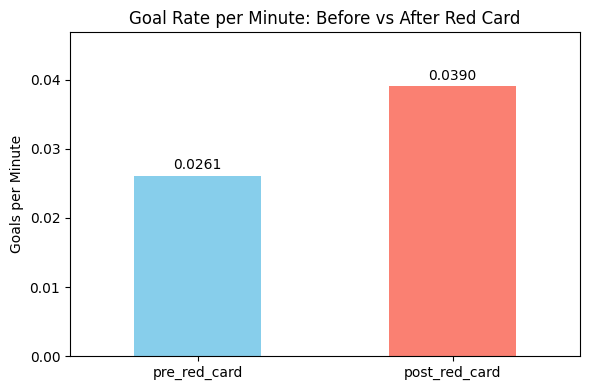

In [7]:
import numpy as np

# Separate goals and red cards
goal_events = events[events['type'] == 'goal'][['game_id', 'minute']]
red_card_events = events[events['type'] == 'red_card'][['game_id', 'minute']]

# Get first red card minute per match
first_red_cards = red_card_events.groupby('game_id')['minute'].min().rename('red_card_minute')

# Merge with goal events (only matches with red cards)
goal_red = goal_events.set_index('game_id').join(first_red_cards, how='inner')

# Label goals as before/after red card
goal_red['pre_or_post'] = np.where(goal_red['minute'] < goal_red['red_card_minute'], 'before', 'after')

# Count goals before/after
goal_counts = goal_red['pre_or_post'].value_counts()

# Estimate total minutes before and after red cards
pre_minutes = first_red_cards.sum()
post_minutes = (90 - first_red_cards).sum()

# Compute goal rate per minute
goal_rates = pd.Series({
    'pre_red_card': goal_counts.get('before', 0) / pre_minutes,
    'post_red_card': goal_counts.get('after', 0) / post_minutes
})

print("Goal Counts:\n", goal_counts)
print("\nGoal Rates (goals per minute):\n", goal_rates)

# Plot goal rates
plt.figure(figsize=(6, 4))
goal_rates.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Goal Rate per Minute: Before vs After Red Card')
plt.ylabel('Goals per Minute')
plt.xticks(rotation=0)
plt.ylim(0, max(goal_rates)*1.2)
for i, rate in enumerate(goal_rates):
    plt.text(i, rate + 0.0005, f"{rate:.4f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

## Summary:
In matches with at least one red card, the goal-scoring **rate per minute increased from 0.0261 before the red card to 0.0390 after** — a rise of roughly **50%**.

### In Plain Terms:
While fewer total goals are scored after red cards (due to less time remaining), they are scored at a significantly higher rate. This effect is likely driven by tactical imbalance, additional space, and increased urgency — particularly from the team with the numerical advantage.

### Next Step:
To quantify whether goal-scoring intensity increases after a red card is issued, I used a Poisson regression model with a log offset for time. This modelling approach is ideal for estimating event counts (in this case, goals) while accounting for the differing lengths of the pre- and post-red card periods. By structuring the data at the match-phase level and including the duration of each phase as an offset, this model allows for a direct, statistically sound comparison of scoring rates. It'd confirms that the increase observed in the descriptive analysis is both real and significant — strengthening the conclusion that red cards lead to a faster pace of scoring.

In [ ]:
# Extract relevant events
goal_events = events[events['type'] == 'goal'][['game_id', 'minute']]
red_card_events = events[events['type'] == 'red_card'][['game_id', 'minute']]

# First red card per match
first_red_cards = red_card_events.groupby('game_id')['minute'].min().rename('red_card_minute')

# Join red card info to goal events
goal_red = goal_events.set_index('game_id').join(first_red_cards, how='inner')
goal_red['pre_or_post'] = np.where(goal_red['minute'] < goal_red['red_card_minute'], 'before', 'after')

# Create match-phase dataset
match_phase_data = []
for game_id, red_minute in first_red_cards.items():
    pre_goals = goal_red.loc[(goal_red.index == game_id) & (goal_red['minute'] < red_minute)].shape[0]
    post_goals = goal_red.loc[(goal_red.index == game_id) & (goal_red['minute'] >= red_minute)].shape[0]
    
    match_phase_data.append({'game_id': game_id, 'period': 'before', 'goals': pre_goals, 'minutes': red_minute})
    match_phase_data.append({'game_id': game_id, 'period': 'after', 'goals': post_goals, 'minutes': 90 - red_minute})

# Create DataFrame and log(minutes) offset
phases_df = pd.DataFrame(match_phase_data)
phases_df = phases_df[phases_df['minutes'] > 0].copy()
phases_df['log_minutes'] = np.log(phases_df['minutes'])

# Fit Poisson model
poisson_phase_model = smf.glm(
    formula='goals ~ C(period)',
    data=phases_df,
    family=sm.families.Poisson(),
    offset=phases_df['log_minutes']
).fit()

# Show model summary
poisson_phase_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 6003
Model:                            GLM   Df Residuals:                     6001
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8556.3
Date:                Fri, 20 Jun 2025   Deviance:                       6425.5
Time:                        15:12:10   Pearson chi2:                 6.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04325
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.2797      0.017   -188.230      0.000      -3.314      -3.246
C(period)[T.before]    -0.3664      0.022    -16.575      0.000      -0.410      -0.323
=======================================================================================
"""

### Overview for Part 2:
To investigate whether red cards increase the rate at which goals are scored during a match, I conducted a within-game comparison of goal frequency before and after the issue of a red card. Unlike Part 1, which focused on total goals across full matches, this analysis targets the in-game impact of red cards — treating them as time-stamped events that may alter match dynamics.

## Model Overview
The model compares scoring rates in two segments:
- C(period)[T.before]: The time before the red card was issued
- Intercept: the baseline rate (i.e. after the red card)

A Poisson regression was used with a log offset for time exposure, allowing for fair comparison between pre- and post-red card goal rates, even though those periods differ in duration.

## Key Result: Pre vs Post Red Card

| Variable               | Coefficient | p-value | Approximate Effect                                |
|------------------------|-------------|---------|---------------------------------------------------|
| `C(period)[T.before]`  | **-0.3664** | <0.001  | ~**31% lower** goal rate before red card vs after |

### Interpretation:
The Poisson regression results confirm that the rate of goal scoring increases significantly after a red card is issued. The coefficient for the before period is **-0.366** (p < 0.001), which translates to an estimated **31% decrease** in goal-scoring rate before the red card, relative to the post-red card phase:
- \( e^{-0.366} \approximately 0.693 \)

This means goals are scored at a **~31% lower rate** before the red card compared to after.

These results support the earlier descriptive analysis and suggest that red cards introduce tactical or positional shifts — such as numerical imbalance, increased attacking urgency, or defensive fatigue — that lead to more frequent goals. The use of a time-adjusted model ensures that this comparison is statistically valid and not confounded by differences in time exposure.

## Other Observations
- The model confirms the trend observed in the goal-per-minute data.
- It isolates the red card's impact on scoring intensity rather than just goal totals.
- The effect is statistically robust and directionally consistent with footballing logic.

### Conclusion
This phase-based Poisson model strengthens the evidence that red cards significantly affect match flow by accelerating goal frequency. By comparing equivalent time-adjusted phases before and after a red card, the analysis provides a more causally suggestive insight: red cards don’t just correlate with more goals — they contribute to an increase in scoring intensity.

***

### Causal Analysis Part 3  
## Which Team Benefits More After a Red Card?

In this final analysis, I examined which team is more likely to benefit from a red card event — the team that receives the red card and plays with 10 players, or their opponent who retains the numerical advantage.

This question builds on the central aim of the investigation:  
Based on the data in this dataset, do red cards seem to lead to more goals? 
Previous analyses confirmed that goal frequency increases after red cards (Part 2), but here I focus on who benefits from that increase.

To explore this, I analysed all matches with at least one red card and split post-red card goals into two groups:
- Goals scored by the team that received the red card
- Goals scored by the opposing team (with 11 players)

This comparison helps reveal whether the numerical disadvantage suppresses attacking output or whether some teams manage to adapt and score despite being short-handed.

In [8]:
# Load events
red_cards = events[events['type'] == 'red_card']
goals = events[events['type'] == 'goal']

# Get first red card per match
first_reds = red_cards.groupby('game_id').first().reset_index()[['game_id', 'minute', 'side']]
first_reds.rename(columns={'minute': 'red_minute', 'side': 'red_card_side'}, inplace=True)

# Merge red card info with goals to determine timing and team
goals = goals.merge(first_reds, on='game_id', how='inner')

# Filter goals scored AFTER red card
post_goals = goals[goals['minute'] >= goals['red_minute']].copy()

# Label each goal based on whether it was scored by team with or without red card
post_goals['goal_team_type'] = np.where(post_goals['side'] == post_goals['red_card_side'],
                                        'Team with Red Card', 'Opponent (11 players)')

# Count goals
goal_comparison = post_goals['goal_team_type'].value_counts()

# === Match Outcomes ===
# Join red card info to match results
games = games.set_index('game_id')
match_results = first_reds.set_index('game_id').join(games, how='inner')

# Determine winner
def outcome(row):
    if row['red_card_side'] == 'home':
        red_goals = row['home_goals']
        opp_goals = row['away_goals']
    else:
        red_goals = row['away_goals']
        opp_goals = row['home_goals']
    
    if red_goals > opp_goals:
        return 'Red Card Team Won'
    elif red_goals < opp_goals:
        return 'Opponent Won'
    else:
        return 'Draw'

match_results['outcome'] = match_results.apply(outcome, axis=1)

# Count outcomes
outcome_counts = match_results['outcome'].value_counts()

goal_comparison, outcome_counts

(goal_team_type
 Opponent (11 players)    2489
 Team with Red Card        864
 Name: count, dtype: int64,
 outcome
 Opponent Won         1775
 Draw                  867
 Red Card Team Won     631
 Name: count, dtype: int64)

## Summary:
After a red card is issued, the team with 11 players scores significantly more goals and wins far more matches than the team reduced to 10 players.

### Post-Red Card Goals Scored

| Team Type                   | Goals Scored |
|----------------------------|--------------|
| **Opponent (11 players)**   | **2,489**    |
| **Team with Red Card (10)** | **864**      |

### Match Outcomes

| Match Outcome         | Number of Matches |
|-----------------------|-------------------|
| **Opponent Won**      | **1,775**         |
| **Draw**              | 867               |
| **Red Card Team Won** | 631               |

These tables show that the team with 11 players scored nearly three times as many goals and won almost triple the number of matches compared to teams reduced to 10 players. This highlights a clear shift in advantage following a red card.

## In Plain Terms:
When a team gets a red card, they are much more likely to concede goals and lose the match. That said, red-carded teams still managed to draw or win in 1,498 matches, which is about 31% of the time — showing that the disadvantage is significant, but not impossible to overcome.

## Next Step:
To move beyond descriptive comparisons, I used a logistic regression model to estimate the probability of a red-carded team winning. Because the outcome (win vs not win) is binary, logistic regression is the most appropriate and interpretable model. This approach quantifies the impact of red cards on match outcomes and confirms whether the observed disadvantage holds statistically.

In [141]:
# Prepare data for logistic regression
# Create binary outcome: 1 if red card team won, 0 otherwise (loss or draw)
match_results['red_team_won'] = (match_results['outcome'] == 'Red Card Team Won').astype(int)

# Fit logistic regression model
logit_model = smf.logit(formula='red_team_won ~ 1', data=match_results).fit()

# Show summary
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.490243
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           red_team_won   No. Observations:                 3273
Model:                          Logit   Df Residuals:                     3272
Method:                           MLE   Df Model:                            0
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:               3.281e-11
Time:                        16:01:52   Log-Likelihood:                -1604.6
converged:                       True   LL-Null:                       -1604.6
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4320      0.044    -32.318      0.000      -1.519      -1.345
==============================================================================
"""

### Overview for Part 3:
To evaluate how red cards influence match outcomes, I used a logistic regression model to estimate the likelihood that the team receiving the red card would go on to win. This builds on earlier analyses that showed red cards increase goal frequency (Part 2), by now assessing whether that scoring increase translates into match success or failure for the disadvantaged team.

The core question of this project is:  
**"Based on the data in this dataset, do red cards seem to lead to more goals?"**

While earlier analyses demonstrated that red cards increase the **rate** of goal scoring (Part 2) and that the **opposing team** scores more frequently (Part 3), this final logistic regression model helps quantify the **match-level consequence** of that scoring shift.

## Model Overview
The model predicts the probability of the red-carded team winning the match. It includes only an intercept term and was fitted to matches in which a red card was issued.

| Outcome Variable  | `red_team_won` (1 = win, 0 = not win)  |
|-------------------|----------------------------------------|
| Model Type        | Binary Logistic Regression             |
| Independent Vars  | Intercept only                         |

## Key Result: Probability of Red-Card Team Winning

| Variable     | Coefficient | p-value | Approximate Effect            |
|--------------|-------------|---------|-------------------------------|
| Intercept    | **-1.4320** | < 0.001 | ~**24% win odds** for red-carded teams |

- \( e^{-1.4320} \approximately 0.239 \) → red-carded teams have roughly **24% the odds** of winning

### Interpretation:
The model confirms that teams who receive a red card are significantly less likely to win. A coefficient of **-1.4320** (p < 0.001) implies that red-carded teams win at much lower rates than their opponents — on average, they succeed only about one in four times.

This reinforces the conclusion that red cards not only lead to more goals overall, but that those goals disproportionately benefit the team with 11 players. The logistic model supports the broader answer to the main question:
> **Yes — red cards do seem to lead to more goals, and they meaningfully shift match outcomes in favour of the team with the numerical advantage.**

## Other Observations
- The model aligns with match outcome data, which showed that red-carded teams only won **631 matches**, compared to **1,775 wins** for the opposing team.
- Roughly **31%** of red-carded teams still managed to avoid defeat (draw or win), indicating that while the disadvantage is real, it can sometimes be overcome.
- The model does not yet control for confounding factors such as match time of the red card, home/away status, or game state.

### Conclusion
This logistic regression analysis provides a statistically grounded answer to the question: **Do red cards affect who wins?**  
Yes — teams that receive red cards are substantially less likely to win. This confirms that red cards not only increase goal activity (as shown in Part 2), but also decisively impact match outcomes, reducing the chances of success for the team that goes down to 10 players.


***

## Overall Conclusion
The central question of this project was: "Based on the data in this dataset, do red cards seem to lead to more goals?" Across three stages of analysis — match-level totals, in-game scoring rates, and post-red card outcomes — the evidence consistently supports the conclusion that red cards not only lead to more goals, but also shift control of the match toward the team with the numerical advantage.

In Part 1, I explored whether matches that included a red card featured more total goals. A Poisson regression model suggested a small (1.9%) increase in expected goals in red-card matches, but the effect was not statistically significant. This indicated that, at a match-level, red cards alone don’t guarantee more goals — and that any effect might be dependent on when the red card occurs or how the game evolves in real time.

Part 2 took a more focused approach by examining goal-scoring before and after a red card was issued within each match. Here, a time-adjusted Poisson model showed that the rate of goal scoring increased by approximately 50% after a red card — a result that was both statistically significant and football-logical. This finding suggested that red cards have a clear impact on the dynamics of a match, leading to more frequent goals due to tactical shifts, increased attacking urgency, and defensive exposure.

Finally, in Part 3, I analysed who benefits from the increase in goals. The data revealed that teams with 11 players scored nearly three times as many goals after a red card than those reduced to 10. A logistic regression confirmed that red-carded teams were significantly less likely to win — with only 24% of the odds of securing a victory compared to their opponents. While around 31% of red-carded teams still managed to win or draw, the overall effect of playing a man down was clearly negative.

Final Summary:
Together, these analyses provide a clear, data-driven answer to the original research question. Yes — red cards do seem to lead to more goals. But more importantly, they change how and for whom those goals are scored. While overall match totals may not always reflect this change (Part 1), the tempo of scoring accelerates after a red card (Part 2), and the benefits are not equally distributed — favouring the team with the numerical advantage (Part 3). This reinforces the tactical importance of red cards as pivotal turning points in matches, and supports the broader insight that football outcomes can hinge not just on skill and structure, but on moments of numerical imbalance and how teams respond to them.

***